Binary Classification with pytorch cancer Dataset

In [1]:
import pandas as pd

In [3]:
cancer_df = pd.read_csv('Cancer_Data.csv')
print(cancer_df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [4]:
print(cancer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
print(cancer_df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [7]:
diagnosis_counts = cancer_df['diagnosis'].value_counts()
print(diagnosis_counts)

diagnosis
B    357
M    212
Name: count, dtype: int64


In [11]:
cancer_df = cancer_df.drop(columns=['id','Unnamed: 32'])
cancer_df['diagnosis'] = cancer_df['diagnosis'].map({'M':1,'B':0})

X = cancer_df.drop(columns=['diagnosis'])
y = cancer_df['diagnosis']


Scaling

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [13]:
import torch

c:\Users\Harsha CVN\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test,dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values,dtype = torch.float32)


In [17]:
from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(X_train_tensor,y_train_tensor)
test_dataset = TensorDataset(X_test_tensor,y_test_tensor )

train_loader = DataLoader(train_dataset, batch_size = 32,shuffle = True)
test_loader  = DataLoader(test_dataset, batch_size=32)

Define Neural netork

In [22]:
import torch.nn as nn
class CancerNN(nn.Module):
    def __init__(self):
        super(CancerNN, self).__init__()
        self.fc1 = nn.Linear(30, 60)  
        self.fc2 = nn.Linear(60, 80)
        self.fc3 = nn.Linear(80, 100)
        self.fc4 = nn.Linear(100, 140)
        self.fc5 = nn.Linear(140, 180)
        self.fc6 = nn.Linear(180, 150)
        self.fc7 = nn.Linear(150, 100)
        self.fc8 = nn.Linear(100, 50)
        self.fc9 = nn.Linear(50, 25)
        self.fc10 = nn.Linear(25, 1)

        self.dropout = nn.Dropout(0.3)  
        
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout(x)
        x = torch.relu(self.fc4(x))
        x = self.dropout(x)
        x = torch.relu(self.fc5(x))
        x = self.dropout(x)
        x = torch.relu(self.fc6(x))
        x = torch.relu(self.fc7(x))
        x = self.dropout(x)
        x = torch.relu(self.fc8(x))
        x = torch.relu(self.fc9(x))
        x = self.sigmoid(self.fc10(x))
        return x

In [24]:
import torch.optim as optim

model = CancerNN()
criterion = nn.BCELoss()
optimizer  = optim.Adam(model.parameters(),lr = 0.001)

In [25]:
def train_model(model,train_loader,criterion,optimizer,epochs = 20):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            labels = labels.unsqueeze(1)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")




In [26]:
train_model(model, train_loader, criterion, optimizer, epochs=40)

Epoch 1/40, Loss: 0.6734093467394511
Epoch 2/40, Loss: 0.5733567088842392
Epoch 3/40, Loss: 0.3764808654785156
Epoch 4/40, Loss: 0.20519172977656125
Epoch 5/40, Loss: 0.06473170450578133
Epoch 6/40, Loss: 0.07925820792249093
Epoch 7/40, Loss: 0.06517664939165116
Epoch 8/40, Loss: 0.05432870512207349
Epoch 9/40, Loss: 0.06044681177784999
Epoch 10/40, Loss: 0.040093467788149914
Epoch 11/40, Loss: 0.03299187378336986
Epoch 12/40, Loss: 0.039243547967635094
Epoch 13/40, Loss: 0.06472348420259853
Epoch 14/40, Loss: 0.0425532015816619
Epoch 15/40, Loss: 0.034904852882027625
Epoch 16/40, Loss: 0.026660754825002186
Epoch 17/40, Loss: 0.25646856674575247
Epoch 18/40, Loss: 0.060459255675474805
Epoch 19/40, Loss: 0.03264167985568444
Epoch 20/40, Loss: 0.027248029631058063
Epoch 21/40, Loss: 0.019180966137597958
Epoch 22/40, Loss: 0.018362153533720022
Epoch 23/40, Loss: 0.01769274671775444
Epoch 24/40, Loss: 0.02605086041148752
Epoch 25/40, Loss: 0.010576825118732813
Epoch 26/40, Loss: 0.00835970

Model Evaluation

In [30]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            labels = labels.unsqueeze(1)
            outputs = model(inputs)
            predicted = (outputs>0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f"Test Accuracy: {accuracy * 100:.2f}%")




In [31]:
evaluate_model(model, test_loader)

Test Accuracy: 97.37%



Saving the Prediction

In [32]:
cancer_df_f = pd.read_csv('Cancer_Data.csv')

In [33]:
X = cancer_df_f.drop(columns=['Unnamed: 32'])

features  = X.drop(columns=['id', 'diagnosis']).columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[features])

X_tensor = torch.tensor(X_scaled, dtype=torch.float32)

In [34]:
# evaluation mode
model.eval()


CancerNN(
  (fc1): Linear(in_features=30, out_features=60, bias=True)
  (fc2): Linear(in_features=60, out_features=80, bias=True)
  (fc3): Linear(in_features=80, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=140, bias=True)
  (fc5): Linear(in_features=140, out_features=180, bias=True)
  (fc6): Linear(in_features=180, out_features=150, bias=True)
  (fc7): Linear(in_features=150, out_features=100, bias=True)
  (fc8): Linear(in_features=100, out_features=50, bias=True)
  (fc9): Linear(in_features=50, out_features=25, bias=True)
  (fc10): Linear(in_features=25, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (sigmoid): Sigmoid()
)

In [35]:
with torch.no_grad():  #  Diable gradient calculation, we dont want to update the weights
    output = model(X_tensor)
    predictions = torch.sigmoid(output).numpy()  # Apply sigmoid to get probabilities
    predicted_labels = (predictions > 0.5).astype(int)

In [36]:
cancer_df_f['predicted'] = predicted_labels

cancer_df_f['predicted'] = cancer_df_f['predicted'].replace({1: 'M', 0: 'B'})

In [37]:
cancer_df_f.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,predicted
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,M
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,M
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,M
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,M
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,M


In [38]:
diagnosis_vs_predicted = cancer_df_f[['diagnosis', 'predicted']]

In [39]:
diagnosis_vs_predicted.head(30)

,diagnosis,predicted
0,M,M
1,M,M
2,M,M
3,M,M
4,M,M
5,M,M
6,M,M
7,M,M
8,M,M
9,M,M


In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = diagnosis_vs_predicted['diagnosis'].replace({'M': 1, 'B': 0})
y_pred = diagnosis_vs_predicted['predicted'].replace({'M': 1, 'B': 0})

In [41]:
cm = confusion_matrix(y_true, y_pred)

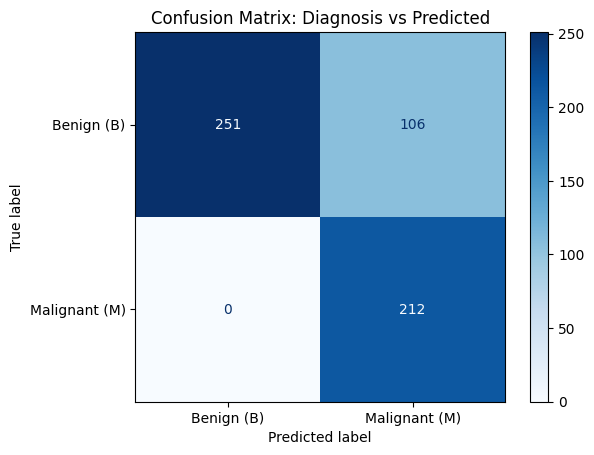

In [42]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign (B)', 'Malignant (M)'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Diagnosis vs Predicted")
plt.show()